In [680]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
# ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
# Используя математические операции, посчитать коэффициенты линейной регрессии, 
# приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
# Произвести расчет как с использованием intercept, так и без.

In [693]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = 10

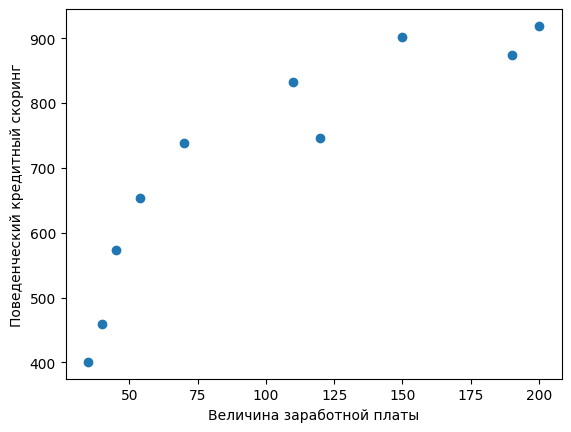

In [596]:
# Посмотрим, есть ли линейная зависимость между данными?
plt.scatter(x, y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

In [597]:
# Уравнение линейной зависимости имеет вид y = a + b*x
# Найдем коэффициенты уравления:

b = (n*np.sum(x*y) - np.sum(x)*np.sum(y)) / (n*sum(x**2) - np.sum(x)**2)
print(f'Коэффициент b: {b}')

a = (np.sum(y)/n) - b*(np.sum(x)/n)
print(f'Коэффициент a: {a}')

# 2 способ
# b1 = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
# a1 = np.mean(y) - b1*np.mean(x)

Коэффициент b: 2.6205388824027653
Коэффициент a: 444.17735732435955


In [598]:
# Получим модель вида y = 444.1773 + 2.6205*x для случайных величин заработной платы и значения скорингового балла
y_pred = a + b*x
print(f'y: {y_pred}')

y: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


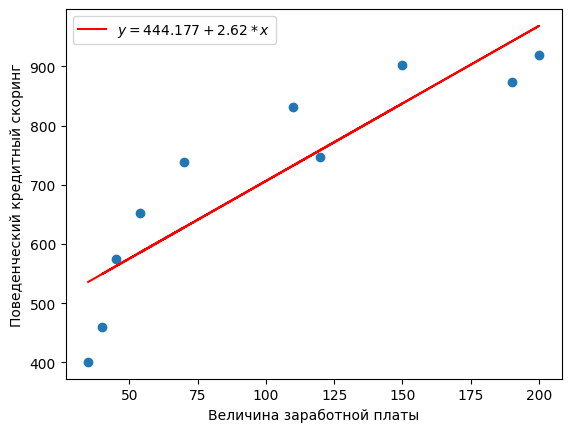

In [626]:
# Отобразим результаты на графике
plt.scatter(x, y)
plt.plot(x, y_pred, c='r', label=r'$y=444.177+2.62*x$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

In [ ]:
# Найдем коэффициенты a и b линейной регрессии с помощью матричного метода

In [702]:
x = x.reshape((n,1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [700]:
y = y.reshape((n,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [711]:
X = x.reshape((n,1))
X = np.hstack([np.ones((n,1)), x])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [715]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[444.17735732],
       [  2.62053888]])

In [ ]:
# 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [627]:
# Посчитаем значение для вычесленного нами коэффициента b
def mse(b, x, y, n):
    return np.sum((b*x-y)**2)/n

print(f'mse: {mse(b, x, y, n)}')

mse: 203763.93896082853


In [641]:
# Теперь попробуем подобрать такое значение коэффициента b, при котором mse -> 0 (use производную)
def mse_p(b, x, y, n):
    return 2/n*np.sum((b*x-y)*x)

alpha=1e-06

b1 = 0.1

for i in range(3000):
    b1 -= alpha * mse_p(b1, x, y, n)
    if i%500==0:
        print(f'i = {i}, b = {b1}, mse = {mse(b1, x, y, n)}')
 
print(f'b: {b1}')

i = 0, b = 0.25952808000000005, mse = 493237.7212546963
i = 500, b = 5.889815595583751, mse = 56516.858416040064
i = 1000, b = 5.8898204201285544, mse = 56516.85841571941
i = 1500, b = 5.889820420132673, mse = 56516.85841571943
i = 2000, b = 5.889820420132673, mse = 56516.85841571943
i = 2500, b = 5.889820420132673, mse = 56516.85841571943
b: 5.889820420132673


In [ ]:
# 3. Произвести вычисления как в пункте 2, но с вычислением intercept. 
# Учесть, что изменение коэффициентов должно производиться на каждом шаге 
# одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [642]:
def mse_ab(a, b, x, y, n):
    return np.sum((a+b*x-y)**2)/n

def mse_a(a, b, x, y, n):
    return 2/n*np.sum(a+b*x-y)

def mse_b(a, b, x, y, n):
    return 2/n*np.sum((a+b*x-y)*x)

In [676]:
alpha = 5e-05
a1 = 0.1
b1 = 0.1

for i in range(450000):
    a1 -= alpha * mse_a(a1, b1, x, y, n)
    b1 -= alpha * mse_b(a1, b1, x, y, n)
    if i%50000 == 0:
        print(f'i = {i}, a = {a1}, b = {b1}, mse = {mse_ab(a1, b1, x, y, n)}')
 
print(f'a = {a1}, b = {b1}')

i = 0, a = 0.169966, b = 8.074680544760001, mse = 122318.06397097581
i = 50000, a = 319.27767648420047, b = 3.5398324356503275, mse = 10427.569111705801
i = 100000, a = 409.0442373734796, b = 2.879127619051743, mse = 6783.521961452364
i = 150000, a = 434.29473705519484, b = 2.693277491833349, mse = 6495.188684804794
i = 200000, a = 441.3974680483413, b = 2.6409995775222037, mse = 6472.374468908443
i = 250000, a = 443.39540029510493, b = 2.62629428586797, mse = 6470.569306309746
i = 300000, a = 443.95740007610897, b = 2.622157823932053, mse = 6470.426473787141
i = 350000, a = 444.1154853937451, b = 2.6209942756156086, mse = 6470.415172240385
i = 400000, a = 444.159953325044, b = 2.6206669802831115, mse = 6470.414278011555
a = 444.17246161683977, b = 2.620574916060588
